# Article 9

In [495]:
#import des datasets
import json 
import pprint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pp = pprint.PrettyPrinter(indent=4, )
#On utilisera pp.pprint() pour afficher plus clairement les dictionnaires
#et les json

## Statistiques simples sur l'article 9
### Découverte du dataset

Un fichier json avec les donnees relatives a l'article 9 est disponible article9.json

    ! Le détail des votes par utilisateurs n'est disponible que dans le fichier **participants.json**

Ce fichier représente les données sous forme de dictionnaire: accessible par clé,valeur nous l'avons stocké dans la variable article9

La première démarche pour connaîre les données et d'afficher les clés disponibles du dictionnaires

Chargeons le fichier article9.json et affichons les clés du dictionnaire:

In [496]:
with open("article9.json", "r") as f:
    article9 = json.load(f)
    pp.pprint(article9.keys())

[   u'subtitle',
    u'cat_id',
    u'updated_at',
    u'sources',
    u'arguments_count',
    u'versions_count',
    u'votes_total',
    u'author',
    u'article_link',
    u'arguments',
    u'answer',
    u'body',
    u'ranking',
    u'sources_count',
    u'votes_ok',
    u'versions',
    u'article_id',
    u'body_anchors',
    u'created_at',
    u'title',
    u'votes_mitige',
    u'body_links',
    u'votes_nok']


### Réorganisation de l'article9 en ref_article9

Nous allons réorganiser le dictionnaire article9 (initialement stocké en json dans article9)
pour plus de clareté dans une variable **ref_article9** (aussi un dictionnaire)

In [497]:
import json, pprint
#la structure de ref_article9

ref_article9 = {"date": {}, 
                "stats": 
                    {"votes":{}, 
                     "arguments":{}, 
                     "sources":{},
                     "versions": {}
                    }, 
                "details": 
                    {"votes":[], 
                     "arguments":[], 
                     "sources":[],
                     "versions":[]}
               }
#pour rappel
#pp.pprint(sorted(article9))
def build_ref_article9(article9, ref_article9):
    #Nous allons téléverser les valeurs de article9 dans ref_article9
    for k,v in sorted(article9.items()):
        if k == "article_link":
            #dans ref_article9 l'url de l'article s'appelera 'link'
            #et non plus 'article_link'
            ref_article9["link"] = v

        #match with date elemnts
        elif k.endswith("_at"):
            ref_article9["date"][k] = v

        elif k.startswith("votes_"):
            #un petit raccourci
            les_votes = ref_article9["stats"]["votes"]
            if k == "votes_nok":
                les_votes["contre"] = v
            elif k == "votes_ok":
                les_votes["pour"] = v
            elif k == "votes_mitige":
                les_votes["neutre"] = v
            else:
                les_votes["total"] = v

        elif k.startswith("arguments_"):
            #un petit raccourci
            les_arguments = ref_article9["stats"]["arguments"]
            if k == "arguments_yes_count":
                les_arguments["pour"] = v
            elif k == "arguments_no_count":
                les_arguments["contre"] = v
            else:
                les_arguments["total"] = v


        elif k.startswith("sources_"):
            #un petit raccourci
            les_sources = ref_article9["stats"]["sources"]
            les_sources["total"] = v
            #on a pas encore les détails des votes sur les sources
            #on l'instancie à 0 pour retrouver ça plus tard dans les votes
            les_sources["pour"] = 0
        elif k.startswith("versions_"):
            ref_article9["stats"]["versions"] = {"total":v}
        elif k in ["versions", "sources", "arguments", "votes"]:
                ref_article9["details"][k] = v
        else:
            #les autres données contextuelles seront accessibles mais via l'article9 directement
             pass
ref_article9 = build_ref_article9(article9, ref_article9)

* On vérifie les valeurs de **ref_article9**:

In [498]:
print "les clés"
pp.pprint(sorted(ref_article9.keys()))

print "les stats"
pp.pprint(ref_article9["stats"])

print "les listes des infos détaillées:"
pp.pprint(ref_article9["details"].keys())

les clés
['date', 'details', 'link', 'stats']
les stats
{   'arguments': {   'total': 132},
    'sources': {   'pour': 0, 'total': 22},
    'versions': {   'total': 108},
    'votes': {   'contre': 1732, 'neutre': 282, 'pour': 1320, 'total': 3334}}
les listes des infos détaillées:
['sources', 'votes', 'arguments', 'versions']


* La répartition simple des types de participations pour l'article9:

In [499]:

stats_article9 = {k: v["total"] for k,v in ref_article9["stats"].items()}
pp.pprint(stats_article9)

{   'arguments': 132, 'sources': 22, 'versions': 108, 'votes': 3334}


L'article 9 compte donc:
* 132 arguments,
* 22 sources, 
* 3334 votes
* 108 versions. 

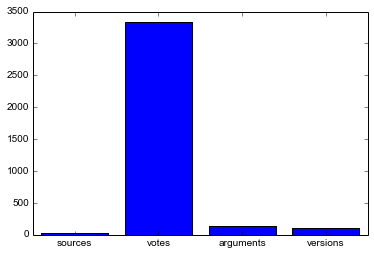

In [500]:
plt.bar(range(len(stats_article9)), stats_article9.values(), align='center')
plt.xticks(range(len(stats_article9)), stats_article9.keys())
plt.show()

Dans article9_ref on trouve les détails des versions, des arguments et des sources.
Le détail des votes n'est pas encore disponible. On le trouve dans les participants.

Le nombre de votes total correspond aux votes sur l'article original et le nombre d'arguments aussi et **non pas sur l'ensemble des versions de l'article**

Nous allons donc faire la comparaison avec l'ensemble des votes sur les différentes versions de l'article9

#### Repartition des votes pour l'article 9 (version originale)

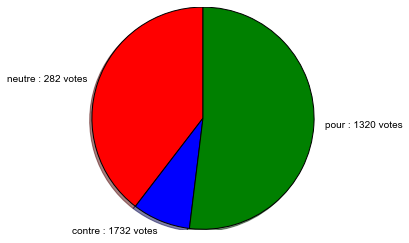

In [501]:
from collections import OrderedDict
#On ordonne le dictionnaire en fonction des clés par ordre alphabetique
stats_votes_article9 = {k: v for k,v in ref_article9["stats"]["votes"].items() if k !="total"}
stats_votes = OrderedDict(sorted(stats_votes_article9.items()))
#Ce qui permet d'y mettre les bonnes couleurs
colors = ["red", "blue", "green"]
legend = [" ".join([k,":",str(v),"votes"]) for k, v in stats_votes_article9.items()]
import matplotlib.pyplot as plt


plt.pie(sizes, labels=legend, colors=colors,shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
#plt.legend(legend) 
fig = plt.figure()
#ax = fig.gca()

## Les 108 versions de l'article 9
### Découverte du dataset
Elles sont contenues dans ```ref_article9["details"]["versions"]```

In [502]:
#Découverte des versions contenues dans le datasets 
for version in ref_article9["details"]["versions"]:
    pp.pprint(sorted(version.keys()))
    break

[   u'after',
    u'arguments_count',
    u'arguments_no_count',
    u'arguments_yes_count',
    u'article_id',
    u'author',
    u'before',
    u'comment',
    u'created_at',
    u'id',
    u'link',
    u'slug',
    u'title',
    u'updated_at',
    u'votes_mitige',
    u'votes_nok',
    u'votes_total']


#### Création d'un référentiel des versions de l'article9
Nous allons réorganiser le contenu des references de versions 

pour rappatrier ensuite les votes qui contient les données détaillées

dans un dictionnaire dont l'id unique sera le slug de version 

(une chaine de caractère qui correspond au titre de la version présente dans l'url)

le dictionnaire **versions_d** sera a peu près organisé comme le dictionnaire **ref_article9**

Pour rappel dans le dictionnaire de l'article9 ref_article9 toutes les versions sont stockées dans une liste
```
ref_article9["details"]["versions"]
```
Verifions que nous avons bien les 108 versions complémentaires

In [503]:
pp.pprint(len(ref_article9["details"]["versions"]))

108


### Création d'un dataset Versions
On va donc créer un dictionnaire qui contiendra les 108 versions de l'article
avec comme clé d'entrée le slug et on ajoutera la version originale de l'article


In [504]:
def build_versions(ref_article9):
    versions_d = {}
    versions = ref_article9["details"]["versions"]
    for vers in versions:
        slug = vers["slug"]
        #ici on prepare la structure de ce qui va être reorganisé
        versions_d[slug] = {u"date":{}, 
                              u"stats":{
                                    "arguments":
                                            {"pour":0, 
                                             "contre":0, 
                                             "total":0},
                                    "votes": 
                                            {"pour":0, 
                                             "contre":0, 
                                             "neutre":0, 
                                             "total":0},
                                    "sources": 
                                            {"pour":0, 
                                             "total":0},

                                        },
                              u"details":{
                                    "arguments":[],
                                    "votes":[],
                                    "sources":[],
                                },
                           u"text":{} 
                           }
        #raccourcis
        stats = versions_d[slug]["stats"]
        stats_votes = stats["votes"]
        stats_args = stats["arguments"]
        stats_sources = stats["sources"]
        details = versions_d[slug]["details"]
        for k,v in vers.items():
            if k.endswith("at"):
                versions_d[slug]["date"][k] = v
            #on met les textes de la version dans text
            elif k in ["before", "after", "comment"]:
                versions_d[slug]["text"][k] = v
            elif k.startswith("votes_"):
                if "mitige" in k:
                    stats_votes["neutre"] = v
                elif "nok" in k:
                    stats_votes["contre"] = v
                elif "ok" in k:
                    stats_votes["pour"] = v
                else:
                    stats_votes["total"] = v


            elif k.startswith("arguments_"):
                if "yes" in k:
                    stats_args["pour"] = v
                elif "no" in k:
                    stats_args["contre"] = v
                else:
                    stats_args["total"] = v
                del k
            elif k.startswith("versions_"):
                del k
            else:
                versions_d[vers["slug"]][k] = v
    return versions_d

versions_d = build_versions(ref_article9)

In [505]:
 #On verifie le résultat du formatage
for k,item in versions_d.items():
    print "les clés"
    pp.pprint(item.keys())
    #notamment celui des stats
    print "les stats"
    pp.pprint(item[u'stats'])
    print "les infos détaillées"
    pp.pprint(item[u'details'].keys())
    break

les clés
[   u'stats',
    u'author',
    u'text',
    u'title',
    u'slug',
    u'link',
    u'details',
    u'date',
    u'article_id',
    u'id']
les stats
{   'arguments': {   'contre': 0, 'pour': 0, 'total': 0},
    'sources': {   'pour': 0, 'total': 0},
    'votes': {   'contre': 3, 'neutre': 0, 'pour': 0, 'total': 7}}
les infos détaillées
['sources', 'votes', 'arguments']


In [506]:
#bizarrerie les stats des votes ne contiennent pas les votes pour
#on va donc recalculer les votes pour
def clean_versions(versions_d):
    for k,item in versions_d.items():
        stats_votes = item[u'stats']['votes']
        #print stats_votes
        stats_votes["pour"] = stats_votes["total"] - (stats_votes["neutre"]+stats_votes["contre"])
    #print "correction", stats_votes
versions_d = clean_versions(versions_d) 

In [507]:
#on verifie que la correction a bien été prise en compte
for k,item in versions_d.items():
    stats_votes = item[u'stats']['votes']
    print stats_votes
    break

{'neutre': 0, 'total': 7, 'contre': 3, 'pour': 4}


* on vérifie que nous avons bien toutes les versions dans versions_d

In [508]:
print len(versions_d), "versions"

108 versions


### Ajout de la version originale 

Nous allons ajouter la version originale à nos versions
en s'assurant que les données sont formattées de la meme manière

In [509]:
#pour rappel
pp.pprint(sorted(versions_d["ne-pas-oublier-les-sets-de-donnees-lies-a-un-article"].keys()))
pp.pprint(versions_d["ne-pas-oublier-les-sets-de-donnees-lies-a-un-article"]["stats"])

[   u'article_id',
    u'author',
    u'date',
    u'details',
    u'id',
    u'link',
    u'slug',
    u'stats',
    u'text',
    u'title']
{   'arguments': {   'contre': 4, 'pour': 3, 'total': 7},
    'sources': {   'pour': 0, 'total': 0},
    'votes': {   'contre': 2, 'neutre': 6, 'pour': 79, 'total': 87}}


In [510]:
pp.pprint(sorted(ref_article9.keys()))
pp.pprint(ref_article9["stats"])


['date', 'details', 'link', 'stats']
{   'arguments': {   'total': 132},
    'sources': {   'pour': 0, 'total': 22},
    'versions': {   'total': 108},
    'votes': {   'contre': 1732, 'neutre': 282, 'pour': 1320, 'total': 3334}}


In [511]:
def build_version_originale():
    version_originale = {
                        "slug":"article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics",
                        "author": "gouvernement",
                        "link":"https://www.republique-numerique.fr/projects/projet-de-loi-numerique/consultation/consultation/opinions/section-2-travaux-de-recherche-et-de-statistique/article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics",
                        "article_id": 69,
                        "id":0,
                        "text":{}, 
                        "date":{}, 
                        "details":{"arguments":[], "votes":[], "sources":[]},
                        "stats":{},
                        }


    for k, v in ref_article9.items():
        if k in ["article_title", "id"]:
            version_original[k] = v
        if k.startswith("body") or k == "answer" or k =="subtitle":
            version_originale["text"][k] = v
        elif k =="date":
            version_originale["date"] = v
        elif k == "stats":
            version_originale[k] = v
        elif k == "details":
            for k2, v2 in v.items():
                if k2 != "versions":
                    version_originale["details"][k2] = v2

        else:
            pass

pp.pprint(version_originale["stats"])

{   'arguments': {   'total': 132},
    'sources': {   'pour': 0, 'total': 22},
    'versions': {   'total': 108},
    'votes': {   'contre': 1732, 'neutre': 282, 'pour': 1320, 'total': 3334}}


In [512]:
#On insere original dans le dictionnaire des versions_d

versions_d["original"] = version_originale

On a bien 109 versions soit 108 versions + 1 version originale
#vérifier le nombre de versions contenues dans le ref versions_d

In [513]:
print len(versions_d)


109


Afficher les versions

In [514]:
#print versions["attention-a-la-qualite-et-a-la-securite-des-textes-scientifiques-qui-doivent-etre-valides-en-amont-promus-et-enrichis-ensuite-par-le-biais-de-bases-de-donnees"]
print(sorted(versions_d["original"].keys()))
print(sorted(versions_d["attention-a-la-qualite-et-a-la-securite-des-textes-scientifiques-qui-doivent-etre-valides-en-amont-promus-et-enrichis-ensuite-par-le-biais-de-bases-de-donnees"].keys()))

['article_id', 'author', 'date', 'details', 'id', 'link', 'slug', 'stats', 'text']
[u'article_id', u'author', u'date', u'details', u'id', u'link', u'slug', u'stats', u'text', u'title']


Si maintenant on regarde les statistiques de votes sur l'article 9 dans son ensemble 

c'est à dire pour les 109 versions on va voir que le nombre de votes d'arguments est bien supérieur 

à ce qu'on trouve dans les stats de l'article original


#### Différences entre les versions et les statistiques de l'article 9

On va faire la somme des votes pour chaque version contenues dans versions_d et comparer avec les votes de la versions originale de même que pour les arguments
Les sources en revanche ont été ajoutées à la V0

##### Les votes:

In [515]:
#full_votes = sum([v["stats"]["votes"]["total"] for k,v in versions_d.items()])
print stats_globales, "votes au total"
print sum(version_originale["stats"]["votes"].values()), "votes sur la VO"
print stats_globales - sum(version_originale["stats"]["votes"].values()), "votes de différence"

12851 votes au total
6668 votes sur la VO
6183 votes de différence


##### Les arguments

In [516]:
full_arguments = sum([v["stats"]["arguments"]["total"] for k,v in versions_d.items()])
V0_arguments = ref_article9["stats"]["arguments"]["total"]
print full_arguments, "arguments emis au total"
print V0_arguments, "arguments sur la V0"
print full_arguments - V0_arguments, "arguments de différence"


481 arguments emis au total
132 arguments sur la V0
349 arguments de différence


#### Différence dans la répartition des votes par versions

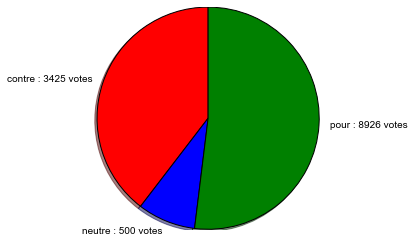

In [517]:
versions_votes_stats = {"pour":[], "contre":[], "neutre":[]}
for slug, version in versions_d.items():
    stats_v = version["stats"]["votes"]
    for pos in ["pour", "contre", "neutre"]:
        versions_votes_stats[pos].append(stats_v[pos])
#on a donc un dictionnaire qui contient des listes d'opinons de votes par version
#On compile le tout
versions_votes_stats = {k:sum(v) for k,v in versions_votes_stats.items()}
#On ordonne le dictionnaire en fonction des clés par ordre alphabetique
versions_votes_stats = OrderedDict(sorted(versions_votes_stats.items()))
#print versions_votes_stats
#Ce qui permet d'y mettre les bonnes couleurs
colors = ["red", "blue", "green"]
legend = [" ".join([k,":",str(v),"votes"]) for k, v in versions_votes_stats.items()]
import matplotlib.pyplot as plt


plt.pie(sizes, labels=legend, colors=colors,shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.

plt.axis('equal')
#plt.legend(legend) 
fig = plt.figure()


In [518]:
#### A comparer avec la répartition des votes sur la version originale

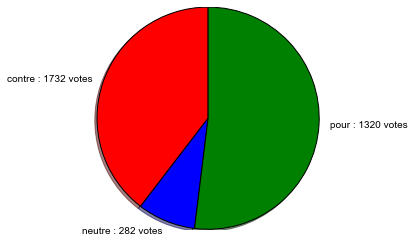

In [519]:
stats_votes = {k:v for k,v in ref_article9["stats"]["votes"].items() if k!="total"}

#On ordonne le dictionnaire en fonction des clés par ordre alphabetique
stats_votes = OrderedDict(sorted(stats_votes.items()))
#Ce qui permet d'y mettre les bonnes couleurs
colors = ["red", "blue", "green"]
legend = [" ".join([k,":",str(v),"votes"]) for k, v in stats_votes.items()]
import matplotlib.pyplot as plt


plt.pie(sizes, labels=legend, colors=colors,shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
#plt.legend(legend) 
fig = plt.figure()
#ax = fig.gca()

### Les votes

Le détails des votes est contenu dans le fichier participants.json 

mais ils sont tous mélangés: 
* les votes sur l'article, 
* les votes sur les sources 
* les votes sur les arguments
* les votes sur la version
* les votes sur un argument d'une version
* les votes sur les sources d'une version ?

On va passer en revue tous les votes des participants et trouver ceux qui correspondent à l'article qui nous intéresse en filtrant sur le nom de l'article contenu dans le lien et construire ainsi un référentiel de votes
ainsi qu'un référentiel d'électeurs pour l'article 9 

In [520]:
#On charge le fichiers participants qui contient toutes les actions de chaque participant
#Ici on ne s'intéresse qu'aux votes
#qui sont détaillés par participants
with open("participants.json", "r") as f:
    data = json.load(f)
    participants = data["participants"]
#Verifions le nombre de participants
print len(participants), "participants sur l'ensemble des articles"

21329 participants sur l'ensemble des articles


In [521]:
#versions_d contient toutes les versions de l'article y compris l'original
#participants contients tous les votes de tous les articles

#Nous allons constituer un dictionnaire qui ne contient que les votes sur l'article9
#ainsi qu'un dictionnaire qui ne contient que les electeurs sur l'article9
#filtré a partir du slug de l'article
art = "article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics"

from collections import defaultdict
#liste des noms des électeurs 
electeurs = [n.keys()[0] for n in participants]
#on crée pour plus de clareté un dictionnaire spécifique aux electeurs de l'article9
electeurs_d = defaultdict.fromkeys(electeurs, [])

In [522]:
#Nombre d'électeurs au total
print len(electeurs), "électeurs"

21329 électeurs


In [523]:

art = "article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics"
#pour chaque participant
for user in participants:
    #accesible via son nom
    name =  user.keys()[0]
    #récupérer les votes de l'utilisateur dans "votes"
    #filtrer ceux qui ont des votes qui correspondent à l'article
    user_votes =  [v for v in user[name]["votes"] if art in v["link"]]
    if  len(user_votes) == 0:
        del electeurs_d[name]
    else:
        electeurs_d[name] = user_votes
        

#Nombre electeurs pour l'article 9
print len(electeurs_d), "électeurs pour l'article9"


5651 électeurs pour l'article9


In [524]:
### Combien de fois cet utilisateur a-t-il voté pour l'article9?
electeur_name = "danielbourrion"
print electeur_name,"a voté", len(electeurs_d[electeur_name]), "fois sur l'article 9"


danielbourrion a voté 13 fois sur l'article 9


In [525]:
# Maintenant rappatrions les votes au bon endroit
#dans un dictionnaire spécifique de votes pour l'article 9
#un vote peut être sur la version de l'article, un arguments de la version ou une source de la version
#votes_d = defaultdict.fromkeys(versions_d.keys(), {"votes":[], "arguments":[], "sources":[]})
votes_d = defaultdict.fromkeys(versions_d.keys(), {"votes":[], "arguments":[], "sources":[]})

cmpt = 0
voc = 0
versions_d["original"]["details"]["votes"]=[]
for user,votes in electeurs_d.items():
    for vote in votes:
        url = vote["link"]
        vote["electeur"] = user
        #vote sur une version
        if "versions" in url:
            slug = url.split("/")[-1]
            if "#arg" in url:
                slug, vote["id"] = slug.split("#")
                votes_d[slug]["arguments"].append(vote)
                continue
            elif "#source" in url:
                slug, vote["id"] = slug.split("#")
                votes_d[slug]["sources"].append(vote)
                continue
            else:
                cmpt = cmpt+1
                #print slug
                versions_d[slug]["details"]["votes"].append(vote)
                votes_d[slug]["votes"].append(vote)
                continue
        #vote sur l'original
        else:
            #vote sur un argument de l'original
            #on a pas encore prévu exactement comment stocker cette info
            #on va la mettre dans votes_d faute de mieux pour l'instant
            
            if "#arg" in url:
                vote["id"] = url.split("#")[-1]
                votes_d["original"]["arguments"].append(vote)
                continue
                #versions_d["original"]["details"]["arguments"].append(vote)
            #vote sur une source de l'original
            
            elif "#source" in url:
                vote["id"] = url.split("#")[-1]
                votes_d["original"]["sources"].append(vote)
                continue
            #vote sur l'article original
            else:
                #print vote
                versions_d["original"]["details"]["votes"].append(vote)
                votes_d["original"]["votes"].append(vote)
                voc = voc+1
                continue

In [526]:
#verification des données aggrégées dans versions_d
#pour la VO

votes_V0 = len(versions_d["original"]["details"]["votes"])
stats_votes_V0 = sum(versions_d["original"]["stats"]["votes"].values())
print votes_V0, stats_votes_V0, "votes pour l'article9 VO"
#pour les versions ultérieures
votes_V109 = sum([len(v["details"]["votes"]) for v in versions_d.values()])
print votes_V109,"votes ensemble des 109 versions"
votes_vs = (votes_V109 - votes_V0)
print votes_vs, "votes sur les autres versions"


#details des votes sur les arguments pour VO
print len(votes_d["original"]["arguments"]),"votes sur les arguments"





3334 6668 votes pour l'article9 VO
12851 votes ensemble des 109 versions
9517 votes sur les autres versions
2522 votes sur les arguments


### Les votes par version



### Matrice de similarité